In [1]:
#.libPaths("/home/senyaaa/BI-PRS/packages")
#.libPaths("/home/kostyadovnar/CVUT/BI-PRS/packages")
#paths("~/tmp/bi-prs/")
# install.packages('dplyr')
# install.packages('gridExtra')

library(dplyr) # download too
library(eurostat)
library(ggplot2)
library(gridExtra) # download too
library(cowplot)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'gridExtra' was built under R version 4.3.3"

Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




In [2]:
surname <- "pogodin"
L <- nchar(surname)
K <- 4
M <- ((K + L) * 47) %% 11 + 1
print(M)

[1] 1


In [3]:
# get id for dataset
srch <- search_eurostat(pattern='Police-recorded offences by NUTS 3 regions')
srch

title,code,type,last.update.of.data,last.table.structure.change,data.start,data.end,values,hierarchy
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
Police-recorded offences by NUTS 3 regions,crim_gen_reg,dataset,05.12.2023,05.12.2023,2008,2021,216947,4
Police-recorded offences by NUTS 3 regions,crim_gen_reg,dataset,05.12.2023,05.12.2023,2008,2021,216947,4


In [4]:
nuts3_cz <- c(
  "CZ010", "CZ020", "CZ031", "CZ032", "CZ041",
  "CZ042", "CZ051", "CZ052", "CZ053", "CZ063",
  "CZ064", "CZ071", "CZ072", "CZ080"
)

## Stažení datasetu

Stahneme potřebný dataset a vybereme rok 2021. 
Odebereme redudantní sloupce jako je freq, TIME_PERIOD.

V našem případě neprovádíme analýzu normalizovaných dat na základě počtu trestných činů na 100 000 obyvatel a zaměřujeme se přímo na samotné počty trestných činů v jednotlivých regionech a kategoriích. Tím pádem odebereme i sloupec unit P_HTHAB.

In [5]:
# Download data
data <- get_eurostat(id = "crim_gen_reg")

# choose only required data and remove unneccesary columns
data$TIME_PERIOD <- as.Date(data$TIME_PERIOD)
czech_data <- data %>%
  filter(geo %in% nuts3_cz, TIME_PERIOD == "2021-01-01")
czech_data$freq <- NULL
czech_data <- czech_data[czech_data$unit != "P_HTHAB", ]
czech_data$unit <- NULL
czech_data$TIME_PERIOD <- NULL

head(czech_data)
tail(czech_data)

Table crim_gen_reg cached at C:\Users\User\AppData\Local\Temp\RtmpMhHFVh/eurostat/0dc489ba9afbe8d422bb3d8a01eacc3a.rds



iccs,geo,values
<chr>,<chr>,<dbl>
ICCS0101,CZ010,7
ICCS0101,CZ020,1
ICCS0101,CZ031,7
ICCS0101,CZ032,2
ICCS0101,CZ041,3
ICCS0101,CZ042,5


iccs,geo,values
<chr>,<chr>,<dbl>
ICCS050211,CZ053,59
ICCS050211,CZ063,51
ICCS050211,CZ064,234
ICCS050211,CZ071,86
ICCS050211,CZ072,57
ICCS050211,CZ080,226


In [6]:
iccs_mapping <- c(
  "ICCS0101" = "Intentional homicide",
  "ICCS02011" = "Assault",
  "ICCS0401" = "Robbery",
  "ICCS0501" = "Burglary",
  "ICCS05012" = "Burglary of private residential premises",
  "ICCS0502" = "Theft",
  "ICCS050211" = "Theft of a motorized land vehicle"
)
nuts3_mapping <- c(
  "CZ010" = "Hlavní město Praha",
  "CZ020" = "Středočeský kraj",
  "CZ031" = "Jihočeský kraj",
  "CZ032" = "Plzeňský kraj",
  "CZ041" = "Karlovarský kraj",
  "CZ042" = "Ústecký kraj",
  "CZ051" = "Liberecký kraj",
  "CZ052" = "Královéhradecký kraj",
  "CZ053" = "Pardubický kraj",
  "CZ063" = "Kraj Vysočina",
  "CZ064" = "Jihomoravský kraj",
  "CZ071" = "Olomoucký kraj",
  "CZ072" = "Zlínský kraj",
  "CZ080" = "Moravskoslezský kraj"
)
# rename for better vizualization
czech_data <- czech_data %>%
  mutate(iccs = iccs_mapping[iccs])
czech_data$geo <- nuts3_mapping[czech_data$geo]

## Základní popis
Zkoumaná data jsou tabulka, která obsahuje tři sloupce: "iccs" (typ trestného činu), "geo" (NUTS 3 region) a "values" (počet trestných činů). Data zahrnují různé typy trestných činů v jednotlivých regionech České republiky.


In [7]:
czech_data

iccs,geo,values
<chr>,<chr>,<dbl>
Intentional homicide,Hlavní město Praha,7
Intentional homicide,Středočeský kraj,1
Intentional homicide,Jihočeský kraj,7
Intentional homicide,Plzeňský kraj,2
Intentional homicide,Karlovarský kraj,3
Intentional homicide,Ústecký kraj,5
Intentional homicide,Liberecký kraj,3
Intentional homicide,Královéhradecký kraj,1
Intentional homicide,Pardubický kraj,0


In [8]:
# split into separate nuts3 tables
region_tables <- split(czech_data, czech_data$geo)

In [9]:
# predefine table
stats_table <- data.frame(
  Region = character(), 
  Min = numeric(),  
  Min_Crime = character(),
  Max = numeric(),  
  Max_Crime = character(),    
  Mean = numeric(), 
  Median = numeric(), 
  stringsAsFactors = FALSE
)

# calculate basic statistic for each nuts3 region
for (region in names(region_tables)) {
  region_data <- region_tables[[region]]

  min_crime <- region_data[which.min(region_data$values), "iccs"]
  max_crime <- region_data[which.max(region_data$values), "iccs"]  

  min_crime <- as.character(min_crime)
  max_crime <- as.character(max_crime)  
    
  summary_stats <- region_data %>%
    summarise(
      Min = min(values),
      Max = max(values),  
      Mean = mean(values),
      Median = median(values),
    )
  
  summary_stats$Region <- region
  summary_stats$Min_Crime <- min_crime
  summary_stats$Max_Crime <- max_crime
  
  # add row
  stats_table <- bind_rows(stats_table, summary_stats)
}

print(stats_table)

                 Region Min            Min_Crime  Max Max_Crime      Mean
1    Hlavní město Praha   7 Intentional homicide 9937  Burglary 2863.0000
2        Jihočeský kraj   7 Intentional homicide 1044     Theft  374.0000
3     Jihomoravský kraj   6 Intentional homicide 3296  Burglary 1043.4286
4      Karlovarský kraj   3 Intentional homicide  633     Theft  229.8571
5         Kraj Vysočina   3 Intentional homicide  508  Burglary  208.5714
6  Královéhradecký kraj   1 Intentional homicide  677     Theft  241.7143
7        Liberecký kraj   3 Intentional homicide  938  Burglary  352.2857
8  Moravskoslezský kraj   4 Intentional homicide 3686  Burglary 1252.0000
9        Olomoucký kraj   2 Intentional homicide 1188     Theft  388.0000
10      Pardubický kraj   0 Intentional homicide  644     Theft  218.4286
11        Plzeňský kraj   2 Intentional homicide 1775  Burglary  549.8571
12     Středočeský kraj   1 Intentional homicide 4006  Burglary 1245.8571
13         Ústecký kraj   5 Intentiona

### Zajímavosti

 * **Praha versus regiony**: Hlavní město Praha vykazuje výrazně vyšší počet trestných činů než většina ostatních regionů. To může být způsobeno vysokou hustotou obyvatelstva a vyšší mírou urbanizace, což vede ke zvýšené kriminalitě v oblastech s větší populací a ekonomickou aktivitou.
 * Jihomoravský kraj a Moravskoslezský mají také vysoký průměrný počet trestných činů (Mean = 1043, Mean = 1252), což může být důsledkem jeho rozsáhlého průmyslového a obchodního sektoru.
 * Naopak Pardubický kraj má nejnižší průměrný počet trestných činů (Mean = 218), což může naznačovat relativně nižší úroveň kriminality v tomto regionu. Jeden z možných důvodu je např. vyšší míra sociální stability a silnější komunitní vazby
 * Minimální hodnoty:
     1. Intentional homicide: nízký počet úmyslných vražd, může to být výsledek několika faktorů jako jsou silné sociální normy proti násilí a vraždám,tyto trestné činy méně tolerovány což je logický. Regiony může mít účinné bezpečnostní opatření, jako je vysoká přítomnost policie, moderní technologie sledování a prevence kriminality
 * Maximální hodnoty:
     1. Theft, burglary: jednoduchost spáchání vloupání a krádeží a riziko, že pachatelé nebudou chyceni, může být jedním z faktorů, které přispívají k vysokým počtům těchto trestných činů. Možnost rychle získat cenný majetek nebo peníze může také motivaci
  
> Burglary/breaking and entering and theft with force or the threat of force (robbery) should be EXCLUDED while ,Theft of a motorized land vehicle should be INCLUDED , based on ICCS manual.

>“Burglary” should include, where possible, theft from a house, apartment or other dwelling place, factory, shop or office, from a military establishment, or by using false keys. It should exclude theft from a car, from a container, from a vending machine, from a parking meter and from fenced meadow/compound.

Z toho vyplývá, že pro korektní zobrazení počtu/rozložení trestných činu měli bychom vynechat činy *Burglary of private residential premises* a *Theft of a motorized land vehicle*, jelikož už jsou zahrnuté v *Burglary* resp. *Theft*
        

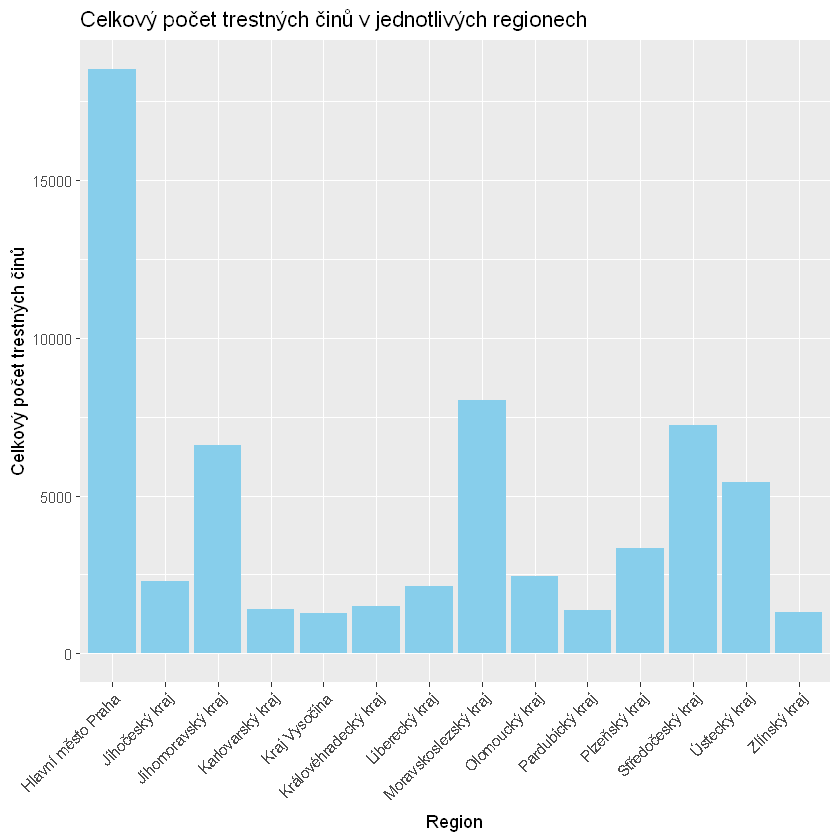

In [10]:
czech_data_no_duplicates <- czech_data %>%
  filter(iccs != "Burglary of private residential premises" & iccs != "Theft of a motorized land vehicle")

ggplot(czech_data_no_duplicates, aes(x = geo, y = values)) +
  geom_bar(stat = "summary", fun = "sum", fill = "skyblue") +
  labs(title = "Celkový počet trestných činů v jednotlivých regionech", 
       x = "Region", y = "Celkový počet trestných činů") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

> Nejvyšší trestnou činnost jsme evidovali v Praze a v Moravskoslezském kraji [kriminalita-v-roce-2021](https://www.policie.cz/clanek/vyvoj-registrovane-kriminality-v-roce-2021.aspx)

> Majetková kriminalita je nejzastoupenější oblastí [kriminalita-v-roce-2021](https://www.policie.cz/clanek/vyvoj-registrovane-kriminality-v-roce-2021.aspx)

Na grafu je patrné, že nejvyšší počet trestných činů je zaznamenán v Praze a v Moravskoslezském kraji. A druhou část budeme moci ověřit z pie chartu. Avšak čísla uváděná na stránkách policie.cz jsou vyšší než ty, které máme v datasetu. Myslím si, že nejsou zaznamenány trestné činy spáchané v souvislosti s dopravními silničními nehodami, kterou by tvořili značnou část datasetu.

#### Rozložení jednotlivých trestných činů v datasetu
* Burglary(vloupání): je nejčastějším trestným činem. Toto číslo může indikovat nedostatečné zabezpečení domů, slabiny v policejním hlídání
* Theft (krádež) je druhým nejčastějším trestným činem, představujícím 42.3% všech případů. Zde může navíc být zkoumáno, pokud by bylo poskutnuto dostatek informaci, zda jsou určité lokality nebo období častěji postiženy krádežemi, a jaké faktory mohou přispívat k tomuto jevu.


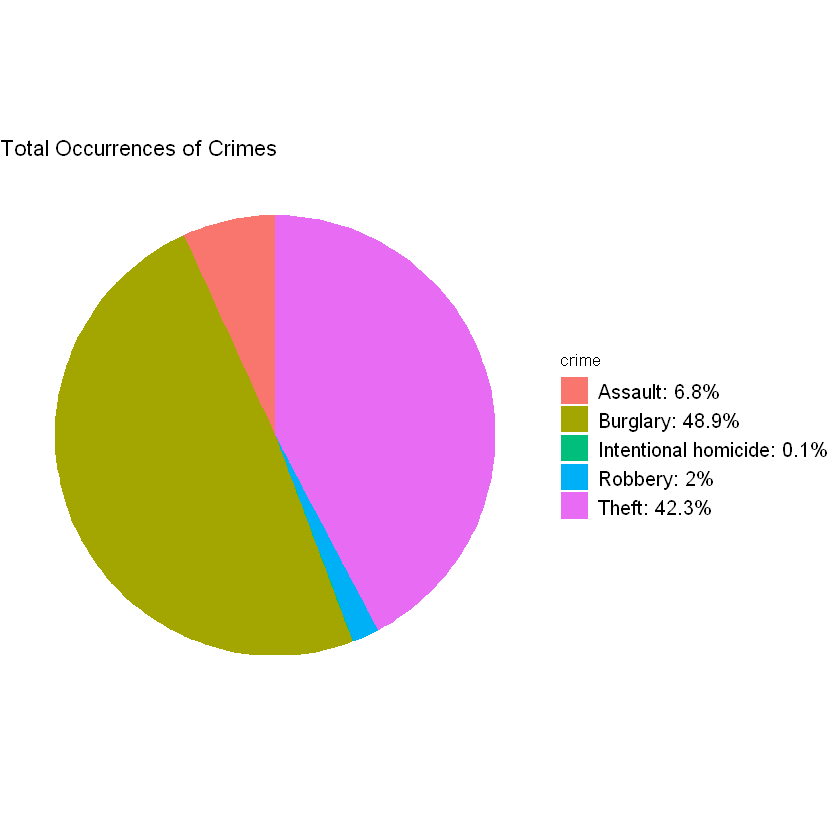

In [11]:
crime_sums <- tapply(czech_data_no_duplicates$values, czech_data_no_duplicates$iccs, sum)
crime_sums_df <- data.frame(crime = names(crime_sums),
                            count = crime_sums)
crime_sums_df$percent <- crime_sums_df$count / sum(crime_sums_df$count) * 100
pie_chart <- ggplot(crime_sums_df, aes(x = "", y = count, fill = crime)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  labs(title = "Total Occurrences of Crimes") +
  theme_void() +
  theme(legend.position = "right",
        legend.text = element_text(size = 12),
        legend.title = element_text(size = 10)) +
  scale_fill_discrete(labels = paste0(crime_sums_df$crime, ": ", round(crime_sums_df$percent, 1), "%"))
print(pie_chart)


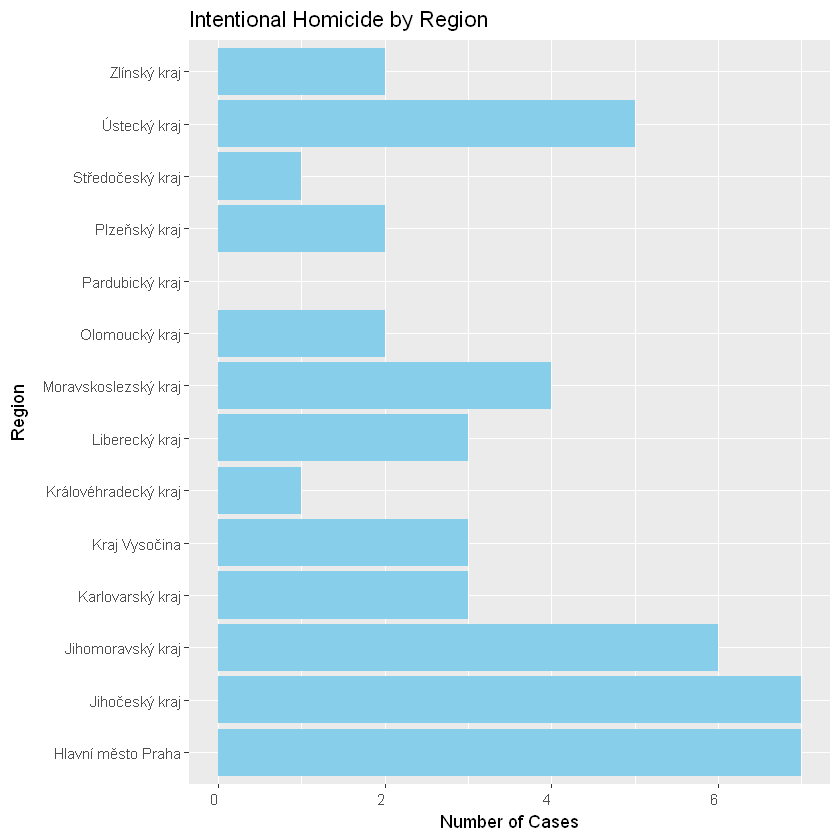

In [12]:
homicide_plot <- ggplot(czech_data[czech_data$iccs == "Intentional homicide", ], aes(x = geo, y = values)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Intentional Homicide by Region", x = "Region", y = "Number of Cases") +
  theme(axis.text.x = element_text(angle = 0, hjust = 1)) +
  coord_flip()
homicide_plot

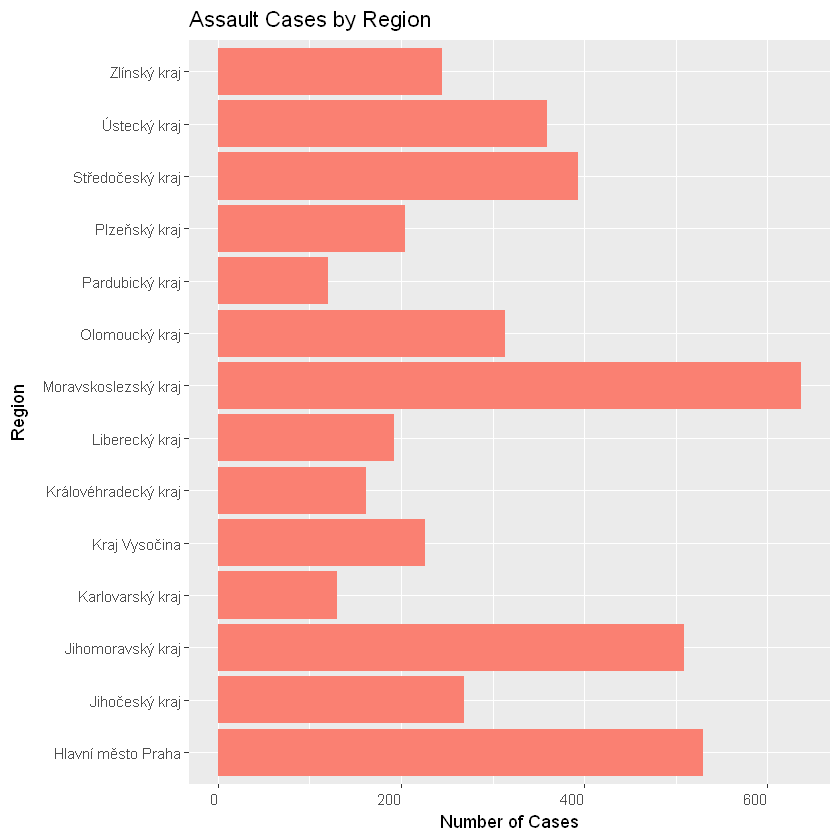

In [13]:
assault_plot <- ggplot(czech_data[czech_data$iccs == "Assault", ], aes(x = geo, y = values)) +
  geom_bar(stat = "identity", fill = "salmon") +
  labs(title = "Assault Cases by Region", x = "Region", y = "Number of Cases") +
  theme(axis.text.x = element_text(angle = 0, hjust = 1)) +
  coord_flip()
assault_plot

## Kontingenční tabulka

Pro začátek zkrátíme názvy jedinečných hodnot atributu "iccs", aby byla tabulka přehlednější.

In [14]:
unique_values <- unique(czech_data$iccs)
unique_values

[1] "Intentional homicide"                    
[2] "Assault"                                 
[3] "Robbery"                                 
[4] "Burglary"                                
[5] "Burglary of private residential premises"
[6] "Theft"                                   
[7] "Theft of a motorized land vehicle"

Opět si můžeme všimnout, že některé atributy se "překrývají", to znamená, že hodnoty jednoho atributu jsou duplikovány v hodnotách druhého. 

Zářným příkladem jsou páry
`Burglary - Burglary of private residential premises` a 
`Theft - Theft of a motorized land vehicle`.
Proto má smysl odstranit atributy, které jsou podmnožinou jiného atributu pro lepší práci.

In [15]:
unique_values <- unique(czech_data_no_duplicates$iccs)
unique_values

[1] "Intentional homicide" "Assault"              "Robbery"             
[4] "Burglary"             "Theft"

In [16]:
# Přejmenování hodnot v atributu 'iccs'
czech_data_no_duplicates$iccs <- recode(czech_data_no_duplicates$iccs,
                               'Intentional homicide' = 'Homicide',
                               'Assault' = 'Asslt',
                               'Robbery' = 'Rbry',
                               'Burglary' = 'Brglry',
                               'Theft' = 'Thft')

Nyní přímo sestavíme kontingenční tabulku, která bude obsahovat počty konkrétních trestných činů v určitých regionech České republiky.

In [17]:
options(width = 120)
kont_tab <- xtabs(formula=values ~ geo + iccs, data=czech_data_no_duplicates)
print(kont_tab)

                      iccs
geo                    Asslt Brglry Homicide Rbry Thft
  Hlavní město Praha     530   9937        7  190 7861
  Jihočeský kraj         269    931        7   43 1044
  Jihomoravský kraj      509   3296        6  174 2623
  Karlovarský kraj       130    599        3   41  633
  Kraj Vysočina          226    508        3   27  499
  Královéhradecký kraj   162    612        1   38  677
  Liberecký kraj         192    938        3   70  929
  Moravskoslezský kraj   637   3686        4  203 3497
  Olomoucký kraj         314    893        2   51 1188
  Pardubický kraj        120    587        0   24  644
  Plzeňský kraj          204   1775        2   66 1302
  Středočeský kraj       393   4006        1  110 2727
  Ústecký kraj           359   2533        5  159 2386
  Zlínský kraj           245    447        2   34  579


In [18]:
kont_tab <- as.table(kont_tab)
addmargins(kont_tab)

,Asslt,Brglry,Homicide,Rbry,Thft,Sum
Hlavní město Praha,530,9937,7,190,7861,18525
Jihočeský kraj,269,931,7,43,1044,2294
Jihomoravský kraj,509,3296,6,174,2623,6608
Karlovarský kraj,130,599,3,41,633,1406
Kraj Vysočina,226,508,3,27,499,1263
Královéhradecký kraj,162,612,1,38,677,1490
Liberecký kraj,192,938,3,70,929,2132
Moravskoslezský kraj,637,3686,4,203,3497,8027
Olomoucký kraj,314,893,2,51,1188,2448
Pardubický kraj,120,587,0,24,644,1375


Z této tabulky lze pozorovat následující:
* **Hlavní město Praha**: V porovnání s ostatními regiony má největší počet trestných činů. Nejčastějšími trestnými činy jsou Vloupání (9937) a krádeže (7861).
* **Kraj Vysočina**: Region s nejmenším celkovým počtem trestných činů (celkově 1263 trestných činů). To znamená, že Kraj Vysočina má nejmenší míru kriminality ve srovnání s ostatními regiony v České republice.
* **Rozdíly mezi regiony**: Tabulka ukazuje výrazné rozdíly v počtu trestných činů mezi jednotlivými regiony České republiky. Tento fakt naznačuje, že kriminalita není rovnoměrně rozložena po celém území, a může být ovlivněna mnoha faktory, jako jsou hustota obyvatelstva, sociální podmínky a ekonomický stav.
* **Dominantní typy trestných činů**: Z tabulky je zřejmé, že nejčastějšími trestnými činy jsou krádeže a vloupání, což je v souladu s obecnými trendy kriminality. Vraždy a loupeže jsou mnohem méně časté.
* **Středočeský kraj jako příkladní případ**: Středočeský kraj má vysoký počet trestných činů, což může být způsobeno jeho blízkostí k Hlavnímu městu Praze a vysokou hustotou obyvatelstva v této oblasti.

In [19]:
probs <- round(prop.table(kont_tab), digits = 4)
addmargins(probs)

,Asslt,Brglry,Homicide,Rbry,Thft,Sum
Hlavní město Praha,0.0084,0.1580,1e-04,0.0030,0.1250,0.2945
Jihočeský kraj,0.0043,0.0148,1e-04,0.0007,0.0166,0.0365
Jihomoravský kraj,0.0081,0.0524,1e-04,0.0028,0.0417,0.1051
Karlovarský kraj,0.0021,0.0095,0e+00,0.0007,0.0101,0.0224
Kraj Vysočina,0.0036,0.0081,0e+00,0.0004,0.0079,0.0200
Královéhradecký kraj,0.0026,0.0097,0e+00,0.0006,0.0108,0.0237
Liberecký kraj,0.0031,0.0149,0e+00,0.0011,0.0148,0.0339
Moravskoslezský kraj,0.0101,0.0586,1e-04,0.0032,0.0556,0.1276
Olomoucký kraj,0.0050,0.0142,0e+00,0.0008,0.0189,0.0389
Pardubický kraj,0.0019,0.0093,0e+00,0.0004,0.0102,0.0218


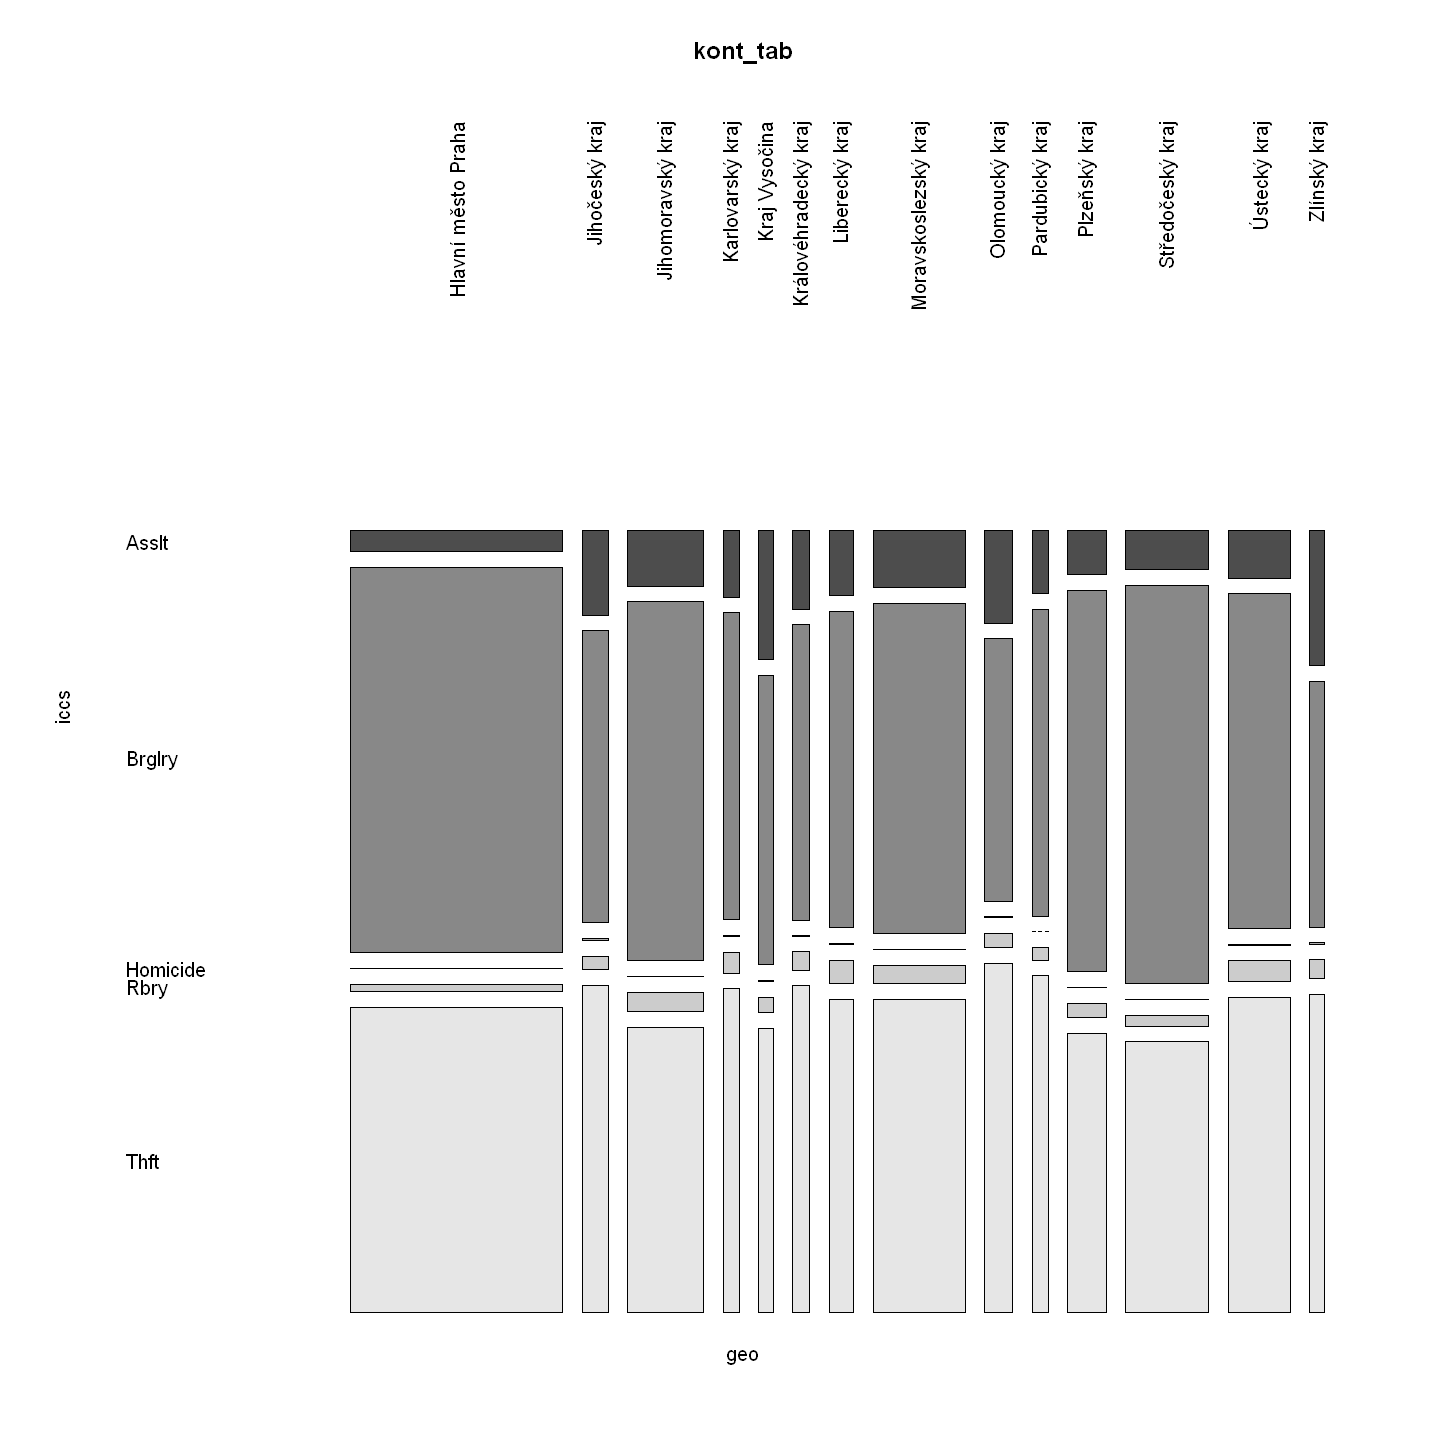

In [20]:
options(repr.plot.width = 12, repr.plot.height = 12)
mosaicplot(kont_tab, color = TRUE, las = 1.5, cex.axis = 1)

* Při pohledu na mozaikový plot by se mohlo zdát, že rozdělení trestných činů v různých regionech je podobné nebo dokonce stejné.
* Na první pohled můžeme vidět, že některé oblasti mají podobně velké dlaždice pro určité trestné činy, což by mohlo naznačovat, že se rozložení trestných činů mezi regiony příliš neliší.
* Pro potvrzení skutečného rozdělení trestných činů mezi regiony bychom měli provést další analýzy.
* Proto provedeme test homogenity rozdělení:
    - $H_0$: Rozdělení trestných činů v jednotlivých regionech České republiky je homogenní, což znamená, že pravděpodobnosti výskytu jednotlivých trestných činů jsou pro všechny regiony stejné
    - $H_A$: neplatí $H_0$

Ověření těchto hypotéz **by bylo** možné pomocí Pearsonova testu $\chi^2$, ale údajně však výsledky testu nebudou zcela relevantní a správné (důvod je uveden dále). Nakonec nám to říká i varování po pokusu o použití tohoto testu. Ale i tak zvědavost zvítězí a podíváme se na výsledek Pearsonova testu.

In [21]:
pearson <- chisq.test(kont_tab)
pearson

Warning message in chisq.test(kont_tab):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  kont_tab
X-squared = 1991.1, df = 52, p-value < 2.2e-16


Tento výsledek indikuje, že existuje statisticky významný vztah mezi trestnými činy a regiony. P-value je mimořádně malé, což znamená, že máme silné důkazy proti nulové hypotéze a lze ji zamítnout. **Podle toho testu** to znamená, že rozložení trestných činů není homogenní mezi regiony České republiky.

In [22]:
addmargins(pearson$observed)

,Asslt,Brglry,Homicide,Rbry,Thft,Sum
Hlavní město Praha,530,9937,7,190,7861,18525
Jihočeský kraj,269,931,7,43,1044,2294
Jihomoravský kraj,509,3296,6,174,2623,6608
Karlovarský kraj,130,599,3,41,633,1406
Kraj Vysočina,226,508,3,27,499,1263
Královéhradecký kraj,162,612,1,38,677,1490
Liberecký kraj,192,938,3,70,929,2132
Moravskoslezský kraj,637,3686,4,203,3497,8027
Olomoucký kraj,314,893,2,51,1188,2448
Pardubický kraj,120,587,0,24,644,1375


In [23]:
addmargins(round(pearson$expected, digits = 2))

,Asslt,Brglry,Homicide,Rbry,Thft,Sum
Hlavní město Praha,1263.41,9055.32,13.55,362.24,7830.49,18525.01
Jihočeský kraj,156.45,1121.34,1.68,44.86,969.67,2294.00
Jihomoravský kraj,450.67,3230.10,4.83,129.21,2793.19,6608.00
Karlovarský kraj,95.89,687.28,1.03,27.49,594.31,1406.00
Kraj Vysočina,86.14,617.37,0.92,24.70,533.87,1263.00
Královéhradecký kraj,101.62,728.34,1.09,29.14,629.82,1490.01
Liberecký kraj,145.40,1042.16,1.56,41.69,901.19,2132.00
Moravskoslezský kraj,547.44,3923.73,5.87,156.96,3393.00,8027.00
Olomoucký kraj,166.95,1196.62,1.79,47.87,1034.77,2448.00
Pardubický kraj,93.78,672.12,1.01,26.89,581.21,1375.01


V "ideálním případě", kdyby rozdělení trestných činů bylo homogenní, očekávali bychom podobné počty trestných činů v jednotlivých regionech. Avšak skutečné hodnoty se významně liší od těchto očekávaných hodnot. Tento významný rozdíl naznačuje, že existují systematické variace v distribuci trestných činů mezi regiony, což jednoznačně potvrzuje nehomogenitu rozdělení. Je však třeba vzít v úvahu i skutečnost, že očekávané hodnoty například vražd se v některých regionech pohybují kolem nuly. Tato skutečnost nepochybně potěšující, nicméně konkrétně pro Pearsonův test to je
problém. To znamená, že nejsou splněny předpoklady Pearsonova testu (neplatí $\frac{n_{i\cdot} n_{\cdot j}}{n}\geq 5$) a na základě tohoto testu nemůžeme potvrdit naše předpoklady.

Proto provedeme Fisherův test:
* $H_0$: Rozdělení trestných činů mezi regiony České republiky je náhodné, tj. není žádný vztah mezi trestnými činy a regiony
* $H_A$: neplatí $H_0$

In [24]:
fisher.test(kont_tab, simulate.p.value=T)


	Fisher's Exact Test for Count Data with simulated p-value (based on 2000 replicates)

data:  kont_tab
p-value = 0.0004998
alternative hypothesis: two.sided


* P-hodnota, která je 0.0004998, je mimořádně nízká, což naznačuje, že máme silné důkazy proti nulové hypotéze. To znamená, že rozdělení trestných činů mezi regiony není náhodné a existuje statisticky významný vztah mezi trestnými činy a regiony.
* Celkově vzato, výsledek Fischerova testu podporuje naši hypotézu o nehomogenitě rozdělení trestných činů mezi regiony.

## Testování hypotéz

### Hypotéza 1:

Zjistíme, zda "Asslt" a "Homicide" nějak korelujou mezi sebou. Uděláme test na korelaci mezi nimi pomocí Spearmanova pořadového korelačního koeficientu:
- $H_0: \rho_S = 0$
- $H_A: \rho_S \ne 0$ (alternativně jednostranná varianta)

In [25]:
correlation <- cor.test(czech_data_no_duplicates$values[czech_data_no_duplicates$iccs == "Homicide"], 
                        czech_data_no_duplicates$values[czech_data_no_duplicates$iccs == "Asslt"],
                       method='spearman')
correlation

Warning message in cor.test.default(czech_data_no_duplicates$values[czech_data_no_duplicates$iccs == :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  czech_data_no_duplicates$values[czech_data_no_duplicates$iccs == "Homicide"] and czech_data_no_duplicates$values[czech_data_no_duplicates$iccs == "Asslt"]
S = 198.16, p-value = 0.03547
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5644793 


Protože p-hodnota (0,035) je menší než 0,05 na hladině významnosti 5%, nulovou hypotézu zamítáme. To znamená, že mezi počtem vražd a počtem napadení v českých krajích existuje statisticky významná závislost. Korelační koeficient (rho) je přibližně 0,564. To naznačuje mírnou pozitivní korelaci mezi počtem vražd a počtem napadení v České Republice.
Tato zjištění naznačuje, že v oblastech s vyšším počtem napadení dochází také ke zvýšené míře vražd.

### Hypotéza 2:

Zjistéme, zda počet trestních čínů v České Republice v roce 2021 je stejný jako v roce 2018. Pro porovnání počtů uděláme Wilcoxonův test, protože nepožaduje předpoklad normálního rozdělení a je vhodný pro diskrétní data:
- $H_0$: Počet trestních činů v roce 2021 je roven počtu trestních činů v roce 2018
- $H_A$: Počet trestních činů v roce 2021 je menší než počet trestních činů v roce 2018

In [26]:
# Download data
data <- get_eurostat(id = "crim_gen_reg")

# choose only required data and remove unneccesary columns
data$TIME_PERIOD <- as.Date(data$TIME_PERIOD)
czech_data_2018 <- data %>%
  filter(geo %in% nuts3_cz, TIME_PERIOD == "2018-01-01")
czech_data_2018$freq <- NULL
czech_data_2018 <- czech_data_2018[czech_data_2018$unit != "P_HTHAB", ]
czech_data_2018$unit <- NULL
czech_data_2018$TIME_PERIOD <- NULL


czech_data_2018 <- czech_data_2018 %>%
  mutate(iccs = iccs_mapping[iccs])
czech_data_2018$geo <- nuts3_mapping[czech_data_2018$geo]

czech_data_2018 <- czech_data_2018 %>%
  filter(iccs != "Burglary of private residential premises" & iccs != "Theft of a motorized land vehicle")

czech_data_2018$iccs <- recode(czech_data_2018$iccs,
                                   'Intentional homicide' = 'Homicide',
                                   'Assault' = 'Asslt',
                                   'Robbery' = 'Rbry',
                                   'Burglary' = 'Brglry',
                                   'Theft' = 'Thft')

head(czech_data_2018)
tail(czech_data_2018)

Dataset query already saved in cache_list.json...

Reading cache file C:\Users\User\AppData\Local\Temp\RtmpMhHFVh/eurostat/0dc489ba9afbe8d422bb3d8a01eacc3a.rds

Table  crim_gen_reg  read from cache file:  C:\Users\User\AppData\Local\Temp\RtmpMhHFVh/eurostat/0dc489ba9afbe8d422bb3d8a01eacc3a.rds



iccs,geo,values
<chr>,<chr>,<dbl>
Homicide,Hlavní město Praha,17
Homicide,Středočeský kraj,17
Homicide,Jihočeský kraj,7
Homicide,Plzeňský kraj,6
Homicide,Karlovarský kraj,3
Homicide,Ústecký kraj,11


iccs,geo,values
<chr>,<chr>,<dbl>
Thft,Pardubický kraj,1245
Thft,Kraj Vysočina,977
Thft,Jihomoravský kraj,6112
Thft,Olomoucký kraj,1945
Thft,Zlínský kraj,1117
Thft,Moravskoslezský kraj,7553


In [27]:
crime_sum_2021 <- czech_data_no_duplicates %>%
    group_by(geo, iccs) %>%
    summarize(total_crimes = sum(values, na.rm = TRUE)) %>%
    ungroup()

print(crime_sum_2021)

`summarise()` has grouped output by 'geo'. You can override using the `.groups` argument.


# A tibble: 70 × 3
   geo                iccs     total_crimes
   <chr>              <chr>           <dbl>
 1 Hlavní město Praha Asslt             530
 2 Hlavní město Praha Brglry           9937
 3 Hlavní město Praha Homicide            7
 4 Hlavní město Praha Rbry              190
 5 Hlavní město Praha Thft             7861
 6 Jihomoravský kraj  Asslt             509
 7 Jihomoravský kraj  Brglry           3296
 8 Jihomoravský kraj  Homicide            6
 9 Jihomoravský kraj  Rbry              174
10 Jihomoravský kraj  Thft             2623
# ℹ 60 more rows


In [28]:
crime_sum_2018 <- czech_data_2018 %>%
    group_by(geo, iccs) %>%
    summarize(total_crimes = sum(values, na.rm = TRUE)) %>%
    ungroup()

print(crime_sum_2018)

`summarise()` has grouped output by 'geo'. You can override using the `.groups` argument.


# A tibble: 70 × 3
   geo                iccs     total_crimes
   <chr>              <chr>           <dbl>
 1 Hlavní město Praha Asslt             574
 2 Hlavní město Praha Brglry           4395
 3 Hlavní město Praha Homicide           17
 4 Hlavní město Praha Rbry              186
 5 Hlavní město Praha Thft            22636
 6 Jihomoravský kraj  Asslt             556
 7 Jihomoravský kraj  Brglry           2483
 8 Jihomoravský kraj  Homicide           16
 9 Jihomoravský kraj  Rbry              179
10 Jihomoravský kraj  Thft             6112
# ℹ 60 more rows


In [29]:
wilcox_test_result <- wilcox.test(crime_sum_2021$total_crimes, crime_sum_2018$total_crimes, alternative = 'less')
print(wilcox_test_result)


	Wilcoxon rank sum test with continuity correction

data:  crime_sum_2021$total_crimes and crime_sum_2018$total_crimes
W = 2277.5, p-value = 0.2367
alternative hypothesis: true location shift is less than 0



Vzhledem k tomu, že p-hodnota je vyšší než 0,05 na hladine významnosti 5%, nulovou hypotézu nezamítáme, což naznačuje, že mezi lety 2021 a 2018 neexistuje významný rozdíl v celkovém počtu trestných činů v České Republice.

Můžeme udělat následující závěr. Stabilita: Celkový počet trestných činů v těchto regionech zůstal ve zkoumaném období (2018 až 2021) relativně stabilní.
Konzistence: Mezi těmito dvěma roky nedošlo k jasnému, statisticky významnému nárůstu nebo poklesu celkového počtu trestných činů.

### Hypotéza 3:

Zjistéme, zda se rozdělené dvou typů trestných činů, konkrétně krádeží a vloupání, od sebe výrazně liší, nebo zda je lze považovat za podobné. Pro porvonávání použijeme Kolmogorovovův-Smirnovův dvouvýběrový test:
- $H_0$: $F=G$
- $H_A$: $F\ne G$

In [30]:
# Download data
data <- get_eurostat(id = "crim_gen_reg")

# choose only required data and remove unneccesary columns
data$TIME_PERIOD <- as.Date(data$TIME_PERIOD)
czech_data_period <- data %>%
  filter(geo %in% nuts3_cz, TIME_PERIOD >= "2018-01-01")
czech_data_period$freq <- NULL
czech_data_period <- czech_data_period[czech_data_period$unit != "P_HTHAB", ]
czech_data_period$unit <- NULL
czech_data_period$year <- format(czech_data_period$TIME_PERIOD, "%Y")
czech_data_period$TIME_PERIOD <- NULL

czech_data_period <- czech_data_period %>%
  mutate(iccs = iccs_mapping[iccs])
czech_data_period$geo <- nuts3_mapping[czech_data_period$geo]

czech_data_period <- czech_data_period %>%
  filter(iccs != "Burglary of private residential premises" & iccs != "Theft of a motorized land vehicle")

czech_data_period$iccs <- recode(czech_data_period$iccs,
                                   'Intentional homicide' = 'Homicide',
                                   'Assault' = 'Asslt',
                                   'Robbery' = 'Rbry',
                                   'Burglary' = 'Brglry',
                                   'Theft' = 'Thft')

head(czech_data_period)
tail(czech_data_period)

Dataset query already saved in cache_list.json...

Reading cache file C:\Users\User\AppData\Local\Temp\RtmpMhHFVh/eurostat/0dc489ba9afbe8d422bb3d8a01eacc3a.rds

Table  crim_gen_reg  read from cache file:  C:\Users\User\AppData\Local\Temp\RtmpMhHFVh/eurostat/0dc489ba9afbe8d422bb3d8a01eacc3a.rds



iccs,geo,values,year
<chr>,<chr>,<dbl>,<chr>
Homicide,Hlavní město Praha,17,2018
Homicide,Hlavní město Praha,14,2019
Homicide,Hlavní město Praha,10,2020
Homicide,Hlavní město Praha,7,2021
Homicide,Středočeský kraj,17,2018
Homicide,Středočeský kraj,10,2019


iccs,geo,values,year
<chr>,<chr>,<dbl>,<chr>
Thft,Zlínský kraj,981,2020
Thft,Zlínský kraj,579,2021
Thft,Moravskoslezský kraj,7553,2018
Thft,Moravskoslezský kraj,7282,2019
Thft,Moravskoslezský kraj,5697,2020
Thft,Moravskoslezský kraj,3497,2021


In [31]:
crime_sum_period <- czech_data_period %>%
    group_by(iccs, year) %>%
    summarize(total_crimes = sum(values, na.rm = TRUE)) %>%
    ungroup()

print(crime_sum_period)

`summarise()` has grouped output by 'iccs'. You can override using the `.groups` argument.


# A tibble: 20 × 3
   iccs     year  total_crimes
   <chr>    <chr>        <dbl>
 1 Asslt    2018          4967
 2 Asslt    2019          5350
 3 Asslt    2020          4514
 4 Asslt    2021          4290
 5 Brglry   2018         21151
 6 Brglry   2019         22161
 7 Brglry   2020         20661
 8 Brglry   2021         30748
 9 Homicide 2018           116
10 Homicide 2019            81
11 Homicide 2020            57
12 Homicide 2021            46
13 Rbry     2018          1406
14 Rbry     2019          1439
15 Rbry     2020          1248
16 Rbry     2021          1230
17 Thft     2018         60115
18 Thft     2019         59850
19 Thft     2020         45638
20 Thft     2021         26589


In [32]:
theft <- subset(crime_sum_period, iccs == "Thft")$total_crimes
burglary <- subset(crime_sum_period, iccs == "Brglry")$total_crimes

# Perform Kolmogorov-Smirnov test
ks_test_result <- ks.test(theft, burglary)
print(ks_test_result)


	Exact two-sample Kolmogorov-Smirnov test

data:  theft and burglary
D = 0.75, p-value = 0.2286
alternative hypothesis: two-sided



Protože p-hodnota (0,23) je vyšší než 0,05 na hladině významnosti 5%, nulovou hypotézu nezamítáme. To naznačuje, že neexistuje dostatek důkazů pro závěr, že se rozdělení trestných činů krádeží a vloupání od sebe významně liší. 
Z analyzovaných údajů vyplývá, že četnost a výskyt trestných činů krádeží a vloupání sleduje v daném období podobné trendy. 